<a href="https://colab.research.google.com/github/FrancescoZanni/Temperature/blob/main/Zanni_Copia_di_mlpns23_final_may.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

copy the notebook to your drive before you start ^^^
# MLPNS 2023 May exam

#RULES:
- ## WORK ALONE

- ## ASK QUESTIONS IN #exam_may ON SLACK (no private message unless I direct you to) - questions are very welcome! if you find any issues or mistakes in the description let me know as well!

- ## TURN IN YOUR WORK WITHIN 72 HOURS BY SHARING YOUR NOTEBOOK WITH ME  - by Sunday 5/14 10AM (see instructions on slack #exam_may

- ## DO NOT POST ON GITHUB.

Schedule an oral exam within three weeks of the complition of the written exam at https://calendly.com/fbbianco/one-on-one. In the oral session you will duscuss and explain your choices. Your grade will be beased on this discussion, not on the written performance itself (i.e. even if you do all the tasks in the written exam, if you cannot talk about them, describe them and motivate them you will not get a good grade and, conversely, if you have problem getting good models but you can discuss effectively what you did and what you could have done you can get a good grade).

## OVERVIEW
This is an exercise in based on the CHAMPS Competition for Predicting Molecular Properties. Specifically, you are to predict the coupling constant between two atom given the two atom types (e.g., C and H), the coupling type (e.g., 2JHC), and any features you are able to create from the molecule structure (xyz) files.

## What I expect in the written exam:
I expect that you will perform the following tasks after having acquired the data:

- Data exploration

- Preprocessing and scaling appropriately as needed

- Model development

- Fitting and evaluation of your model performance

- Exploration into the model performance


**All figures should have captions and axis labels**

Please dont forget axis labels and captions! Make figures wherever apprioriate to understand the data/results (feel free to put figures in addition to the ones requested explicitly below).

**Discussion**

Put your "narrative" in text cells. Present the code neatly, deleting cells of code used for testing but leaving in all cells needed for the code to work.

I expect that you will discuss each step and to what extent it was successful, to what extent it can be improved.

I expect a justification for all your choices (e.g. how you deal with missing or redundant values, hyperparameter choices) includind a description of possible shortcomings of your choices.

**Reproducibility**

I expect your code to be reproducible and to run: _reproducible means that when I run it by Restart Kernel -> Run all I should get the exact same numbers you presented_. Where random numbers are used you should seed your random sequence (by setting a seed or the random_state if available in the model). "Running" means that your code should, run with no bugs or breaks top tp bottom; when I click Runtime RunAll the code should not stop until the last cell. Make sure you restart the kernel and rerun your code from the beginning to assure it works before you deliver it!






# TASK I :  Data Acquisition
 You can download the data from kaggle
 --- https://www.kaggle.com/competitions/champs-scalar-coupling/data (agree to the competition rules to enable download, find the command to download using python at the bottom of the page, use the kaggle software to download the data within your notebook as done for example in https://github.com/fedhere/MLPNS_FBianco/blob/main/CART/higgsbosonSearch.ipynb)

 Make sure that the data is obtained in a way that is reproducible but that it does not expose your Kaggle API keys (do not print the credentials). You will use the **training data and the structure files** only - you wont need to use the rest of the files (you can tho if you want to create more complex models).

 (Note: the unzip will take a long time to unzip the structure folder, although you can read the info in that folder from the structures.csv file so you will not need the data in the structures folder.)

 Important: make a folder on your google drive called MLPNS23_final and put your data and work in that folder.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install astroML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 6.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import pylab as pl
import json
import os
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from astroML import plotting
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sn
from sklearn import metrics
from sklearn import preprocessing


/usr/local/lib/python3.10/dist-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd drive/MyDrive/

/content/drive/MyDrive


Il mio kaggle.json è all'interno di MyDrive

In [ ]:
!chmod 600 kaggle.json

In [ ]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [ ]:
mkdir -p MLPNS23_final

L'opzione -p dovrebbe, nel caso la cartella fosse già esistente, non dare errore e procedere senza eseguire il comando.

In [ ]:
cd MLPNS23_final

/content/drive/MyDrive/MLPNS23_final


In [ ]:
!kaggle competitions download -c champs-scalar-coupling

champs-scalar-coupling.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
ls

champs-scalar-coupling.zip      sample_submission.csv
DF.csv                          scalar_coupling_contributions.csv
DF.npy                          structures/
dipole_moments.csv              structures.csv
magnetic_shielding_tensors.csv  test.csv
mulliken_charges.csv            train.csv
potential_energy.csv



Lascio l'unzipping commentato per evitare che chieda di sovrascrivere i file


In [ ]:
#!unzip champs-scalar-coupling.zip

In [ ]:
ls

champs-scalar-coupling.zip      sample_submission.csv
DF.csv                          scalar_coupling_contributions.csv
DF.npy                          structures/
dipole_moments.csv              structures.csv
magnetic_shielding_tensors.csv  test.csv
mulliken_charges.csv            train.csv
potential_energy.csv


Inizio leggendo i due dataframes

In [ ]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(4659076, 6)


,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [ ]:
structure = pd.read_csv("structures.csv")
print(structure.shape)
structure.head()

(2358875, 6)


,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [ ]:
train.describe()

,id,atom_index_0,atom_index_1,scalar_coupling_constant
count,4.659076e+06,4.659076e+06,4.659076e+06,4.659076e+06
mean,2.329538e+06,1.335677e+01,5.881245e+00,1.591591e+01
std,1.344960e+06,3.269432e+00,4.993794e+00,3.493466e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,-4.476050e+01
25%,1.164769e+06,1.100000e+01,2.000000e+00,-2.551462e-01
50%,2.329538e+06,1.300000e+01,5.000000e+00,2.280350e+00
75%,3.494306e+06,1.600000e+01,8.000000e+00,7.389100e+00
max,4.659075e+06,2.800000e+01,2.800000e+01,2.077090e+02


In [ ]:
structure.describe()

,atom_index,x,y,z
count,2.358875e+06,2.358875e+06,2.358875e+06,2.358875e+06
mean,8.757255e+00,9.495981e-02,-3.335625e-01,6.239050e-02
std,5.592444e+00,1.655403e+00,1.989328e+00,1.445876e+00
min,0.000000e+00,-9.234889e+00,-9.933938e+00,-9.134765e+00
25%,4.000000e+00,-8.746228e-01,-1.826097e+00,-8.424758e-01
50%,9.000000e+00,5.183962e-02,-4.034906e-01,1.092888e-02
75%,1.300000e+01,1.116163e+00,1.373848e+00,9.393901e-01
max,2.800000e+01,9.382240e+00,1.018196e+01,7.894733e+00


# TASK II :  Data Cleaning, Preparation, and Fusion

Read into dataframes the files _train.csv_ and _structure.csv_

Your target variable is `scalar_coupling_constant`

**Answer this Question (in a text cell)**: which kind of machine learning task are we performing if we want to predict `scalar_coupling_constant` (given the nature of this variable)

 Check and address in the train file missing and/or duplicate values:
- missing values -> remove or fill in
- duplicate entries -> remove

Merge the _structure_ values with the _training_ data. Each atom is associated with a value of x-y-z included in the structures.csv file. You need to
- merge the structure dataframe to the train dataframe using the name of the `molecule name` and the value of `atom_index` in structure and `molecule name` and `atom_index_0` in train.
- merge again the resulting file with structure using the `molecule name` and the value of `atom_index` in structure and `molecule name`
 and `atom_index_1` in train

 _this is a technique we have not seen very often in class, but you can help yourself with the documentation of the method **merge** - given two dataframes df1 and df2_
```df1.merge(df1, left_on=[df1_column1, df1_column2], right_on=[df2_column1, df2_column2]...)```

 At least one variable is a multi-class categorical. Convert it to a one-hot-encoded variable (Hint: we have seen examples of this with the zipcode in the notebook in https://github.com/fedhere/MLPNS_FBianco/tree/main/OHE and in slide deck 6)


 Sanity check: compare the shape of your dataframe with mine at this point: I had 19 columns and 4503143. You do not need to have the exact shape as mine, you may have made different choices that would lead to different numbers. But you should be able to make sense of the number I have and the numbers you have based on the choices you made and the process I described above.

**Risposta:** La variabile da predire, ovvero `scalar_coupling_costant` è una variabile continua, di conseguenza il tipo di problema che stiamo afforntando è un problema di **regressione**.

I modelli disponibili sono diversi, verrà discussa la scelta del modello al punto 4

In [ ]:
 print("The original train dataset contains "
"{} features for {} bonds".format(train.shape[1],train.shape[0]))

The original train dataset contains 6 features for 4659076 bonds


Ho modificato la parola "molecules" con "bonds", in quanto le molecole in totale sono circa 85 mila (`train["molecule_name"].unique()`),

 ma ciò che ci interessa, ovvero le observations sono i legami fra coppie di atomi all'interno delle molecole.

##Merging e Ricerca di valori mancanti e duplicati
Per verificare la presenza di missing values o NaN visualizzo tramite missingno la matrice delle missing values per entrambi i dataframe: \\
Le lascio commentate, non ci sono valori mancanti e impiegano tempo e memoria

In [ ]:
#msno.matrix(train);

In [ ]:
#msno.matrix(structure);

Non sembrano presenti Nan o valori mancanti.

Come conferma stampo il totale dei NaN utilizzando il metodo .isna(), dal quale ho la conferma che non ci sono valori mancanti.

In [ ]:
print(train.isna().sum())
print(structure.isna().sum())

id                          0
molecule_name               0
atom_index_0                0
atom_index_1                0
type                        0
scalar_coupling_constant    0
dtype: int64
molecule_name    0
atom_index       0
atom             0
x                0
y                0
z                0
dtype: int64


Procedo con il merging dei due DataFrame: ovvero aggiungo al primo dataframe (che contiene informazioni riguardo il tipo di legame e la coupling constant) la posizione di ciascuno dei due atomi, in termini di coordinate cartesiane.

è necessario eseguire il comando merge due volte in modo da aggiungere la posizione di entrambi gli atomi che concorrono al legame, questo risulterà in due coppie di colonne identiche, che verranno eliminate.

In [ ]:
print(train.columns)
print(structure.columns)

Index(['id', 'molecule_name', 'atom_index_0', 'atom_index_1', 'type',
       'scalar_coupling_constant'],
      dtype='object')
Index(['molecule_name', 'atom_index', 'atom', 'x', 'y', 'z'], dtype='object')


In [ ]:
pd.merge?

In [ ]:
semi_merged=train.merge(structure, left_on=["molecule_name", "atom_index_0"], right_on=["molecule_name", "atom_index"])
semi_merged.rename({"atom_index": "atom_index_0_bis"}, axis=1, inplace=True)
semi_merged.rename({"x": "x_0"}, axis=1, inplace=True)
semi_merged.rename({"y": "y_0"}, axis=1, inplace=True)
semi_merged.rename({"z": "z_0"}, axis=1, inplace=True)
semi_merged.rename({"atom": "atom_0"}, axis=1, inplace=True)



merged=semi_merged.merge(structure, left_on=["molecule_name", "atom_index_1"], right_on=["molecule_name", "atom_index"])
merged.rename({"atom_index": "atom_index_1_bis"}, axis=1, inplace=True)
merged.rename({"x": "x_1"}, axis=1, inplace=True)
merged.rename({"y": "y_1"}, axis=1, inplace=True)
merged.rename({"z": "z_1"}, axis=1, inplace=True)
merged.rename({"atom": "atom_1"}, axis=1, inplace=True)
merged


,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_index_0_bis,atom_0,x_0,y_0,z_0,atom_index_1_bis,atom_1,x_1,y_1,z_1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.807600,1,H,0.002150,-0.006031,0.001976,0,C,-0.012698,1.085804,0.008001
1,4,dsgdb9nsd_000001,2,0,1JHC,84.807400,2,H,1.011731,1.463751,0.000277,0,C,-0.012698,1.085804,0.008001
2,7,dsgdb9nsd_000001,3,0,1JHC,84.809300,3,H,-0.540815,1.447527,-0.876644,0,C,-0.012698,1.085804,0.008001
3,9,dsgdb9nsd_000001,4,0,1JHC,84.809500,4,H,-0.523814,1.437933,0.906397,0,C,-0.012698,1.085804,0.008001
4,1,dsgdb9nsd_000001,1,2,2JHH,-11.257000,1,H,0.002150,-0.006031,0.001976,2,H,1.011731,1.463751,0.000277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659071,4659040,dsgdb9nsd_133884,13,17,3JHH,3.062820,13,H,2.582409,-1.260138,0.293499,17,H,1.126550,-1.348733,-1.933838
4659072,4659067,dsgdb9nsd_133884,16,17,3JHH,0.789559,16,H,-0.084531,1.110807,-1.796741,17,H,1.126550,-1.348733,-1.933838
4659073,4659038,dsgdb9nsd_133884,13,14,3JHH,1.005250,13,H,2.582409,-1.260138,0.293499,14,H,2.087537,1.391489,0.548687
4659074,4659039,dsgdb9nsd_133884,13,15,3JHH,1.005260,13,H,2.582409,-1.260138,0.293499,15,H,1.542918,0.547487,2.023550


Verifico che le coppie di colonne relative ai due atom index siano esattamente uguali, dopo di che elimino quelle sovrabbondanti.
La verifica consiste nell'osservare che il numero di righe nelle quali `atom_index_0` è uguale a `atom_index_0_bis` è uguale al numero totale di righe.


(Questa verifica probabilmente è evitabile visto il funzionamento del comando merge)

In [ ]:
print(merged[merged.atom_index_0 == merged.atom_index_0_bis ].shape[0])
print(merged[merged.atom_index_1 == merged.atom_index_1_bis ].shape[0])
print(merged.shape)


4659076
4659076
(4659076, 16)


In [ ]:
merged.drop(columns = ["atom_index_0_bis","atom_index_1_bis"], inplace = True)

In [ ]:
print("After the merge the dataset contains "
"{} features for {} molecules".format(merged.shape[1],merged.shape[0]))

After the merge the dataset contains 14 features for 4659076 molecules


Inizio a cercare duplicati:


In [ ]:
print(merged.duplicated().sum())

0


Non ci sono righe duplicate, questo significa che nel caso siano presenti legami duplicati, essi hanno comunque un ID differente. Di conseguenza è necessario controllare su un subset delle colonne.

In [ ]:
merged_nodupes = merged.drop_duplicates( subset = ["atom_index_0", "atom_index_1", "type", "scalar_coupling_constant"])
merged_nodupes.shape

(4503143, 14)

La scelta delle colonne sulle quali cercare duplicati è fatta in modo da cercare legami in cui siano uguali gli indici degli atomi, la costante di accoppiamento e il tipo di legame (quindi di conseguenza i due atomi, siccome nel tipo è riportato il simbolo di entrambi gli elementi).

questo criterio potrebbe essere fallace, in quanto gli atomi potrebbero essere in posizioni differenti, un possibile miglioramento potrebbe essere quello di scartare soltanto duplicati in cui si ha la stessa costante di accoppiamento, tipo di interazione e distanza tra i due atomi.

Osservo che effettivamente erano presenti dei duplicati e sono stati scartati.

In [ ]:
print("Removing duplicated and missing data I lost {:.2}% of the data" \
      .format(1-(merged_nodupes.shape[0]/merged.shape[0])))

Removing duplicated and missing data I lost 0.033% of the data


##One Hot Encoding

In [ ]:
mergedOHE = pd.merge(merged_nodupes, pd.get_dummies(merged_nodupes['type']), left_index=True, right_index=True).drop(columns="type")

print(mergedOHE.shape)
mergedOHE

(4503143, 21)


,id,molecule_name,atom_index_0,atom_index_1,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,...,y_1,z_1,1JHC,1JHN,2JHC,2JHH,2JHN,3JHC,3JHH,3JHN
0,0,dsgdb9nsd_000001,1,0,84.807600,H,0.002150,-0.006031,0.001976,C,...,1.085804,0.008001,1,0,0,0,0,0,0,0
1,4,dsgdb9nsd_000001,2,0,84.807400,H,1.011731,1.463751,0.000277,C,...,1.085804,0.008001,1,0,0,0,0,0,0,0
2,7,dsgdb9nsd_000001,3,0,84.809300,H,-0.540815,1.447527,-0.876644,C,...,1.085804,0.008001,1,0,0,0,0,0,0,0
3,9,dsgdb9nsd_000001,4,0,84.809500,H,-0.523814,1.437933,0.906397,C,...,1.085804,0.008001,1,0,0,0,0,0,0,0
4,1,dsgdb9nsd_000001,1,2,-11.257000,H,0.002150,-0.006031,0.001976,H,...,1.463751,0.000277,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659071,4659040,dsgdb9nsd_133884,13,17,3.062820,H,2.582409,-1.260138,0.293499,H,...,-1.348733,-1.933838,0,0,0,0,0,0,1,0
4659072,4659067,dsgdb9nsd_133884,16,17,0.789559,H,-0.084531,1.110807,-1.796741,H,...,-1.348733,-1.933838,0,0,0,0,0,0,1,0
4659073,4659038,dsgdb9nsd_133884,13,14,1.005250,H,2.582409,-1.260138,0.293499,H,...,1.391489,0.548687,0,0,0,0,0,0,1,0
4659074,4659039,dsgdb9nsd_133884,13,15,1.005260,H,2.582409,-1.260138,0.293499,H,...,0.547487,2.023550,0,0,0,0,0,0,1,0


In [ ]:
print("After one-hot-encoding the dataset contains "
"{} features for {} bonds".format(mergedOHE.shape[1],mergedOHE.shape[0]))

After one-hot-encoding the dataset contains 21 features for 4503143 bonds


##Setup finale del DataFrame

Siccome potrebbe risultare utile creo una colonna contenente la distanza euclidea tra i due atomi

In [ ]:
mergedOHE["distance"] = (mergedOHE["x_0"]-mergedOHE["x_1"])**2 +(mergedOHE["y_0"]-mergedOHE["y_1"])**2 +(mergedOHE["z_0"]-mergedOHE["z_1"])**2

Riordino le colonne per ragioni soltanto estetiche

In [ ]:
merged_train = mergedOHE[['id', 'molecule_name', 'atom_0','atom_1','atom_index_0', 'atom_index_1', 'x_0', 'y_0', 'z_0',
       'x_1', 'y_1', 'z_1', "distance", '1JHC', '1JHN', '2JHC', '2JHH', '2JHN', '3JHC',
       '3JHH', '3JHN',
       'scalar_coupling_constant']]
merged_train

,id,molecule_name,atom_0,atom_1,atom_index_0,atom_index_1,x_0,y_0,z_0,x_1,...,distance,1JHC,1JHN,2JHC,2JHH,2JHN,3JHC,3JHH,3JHN,scalar_coupling_constant
0,0,dsgdb9nsd_000001,H,C,1,0,0.002150,-0.006031,0.001976,-0.012698,...,1.192361,1,0,0,0,0,0,0,0,84.807600
1,4,dsgdb9nsd_000001,H,C,2,0,1.011731,1.463751,0.000277,-0.012698,...,1.192358,1,0,0,0,0,0,0,0,84.807400
2,7,dsgdb9nsd_000001,H,C,3,0,-0.540815,1.447527,-0.876644,-0.012698,...,1.192347,1,0,0,0,0,0,0,0,84.809300
3,9,dsgdb9nsd_000001,H,C,4,0,-0.523814,1.437933,0.906397,-0.012698,...,1.192349,1,0,0,0,0,0,0,0,84.809500
4,1,dsgdb9nsd_000001,H,H,1,2,0.002150,-0.006031,0.001976,1.011731,...,3.179516,0,0,0,1,0,0,0,0,-11.257000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659071,4659040,dsgdb9nsd_133884,H,H,13,17,2.582409,-1.260138,0.293499,1.126550,...,7.088407,0,0,0,0,0,0,1,0,3.062820
4659072,4659067,dsgdb9nsd_133884,H,H,16,17,-0.084531,1.110807,-1.796741,1.126550,...,7.534847,0,0,0,0,0,0,1,0,0.789559
4659073,4659038,dsgdb9nsd_133884,H,H,13,14,2.582409,-1.260138,0.293499,2.087537,...,7.341145,0,0,0,0,0,0,1,0,1.005250
4659074,4659039,dsgdb9nsd_133884,H,H,13,15,2.582409,-1.260138,0.293499,1.542918,...,7.341127,0,0,0,0,0,0,1,0,1.005260


Elimino le colonne che portano il simbolo dei due atomi per due motivi:
- Il primo atomo è sempre idrogeno (si può verificare attraverso `merged_train["atom_1"].unique()`

- In ogni caso il tipo di legame riporta i simboli dei due atomi che lo caratterizzano, questa informazione è quindi già presente all'interno delle categorie binarie risultanti dal OHE.

In [ ]:
merged_train.drop(columns = ["atom_0", "atom_1"], inplace = True)

<ipython-input-36-6f06975dbdd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_train.drop(columns = ["atom_0", "atom_1"], inplace = True)


Per evitare di occupare spazio inutilizzato in memoria elimino i dataframe intermedi che non servono più

In [ ]:
del semi_merged
del mergedOHE
del merged
del merged_nodupes
del train
del structure

Al termine del data cleaning il Dataframe completo è il seguente:

In [ ]:
merged_train

,id,molecule_name,atom_index_0,atom_index_1,x_0,y_0,z_0,x_1,y_1,z_1,distance,1JHC,1JHN,2JHC,2JHH,2JHN,3JHC,3JHH,3JHN,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,0.002150,-0.006031,0.001976,-0.012698,1.085804,0.008001,1.192361,1,0,0,0,0,0,0,0,84.807600
1,4,dsgdb9nsd_000001,2,0,1.011731,1.463751,0.000277,-0.012698,1.085804,0.008001,1.192358,1,0,0,0,0,0,0,0,84.807400
2,7,dsgdb9nsd_000001,3,0,-0.540815,1.447527,-0.876644,-0.012698,1.085804,0.008001,1.192347,1,0,0,0,0,0,0,0,84.809300
3,9,dsgdb9nsd_000001,4,0,-0.523814,1.437933,0.906397,-0.012698,1.085804,0.008001,1.192349,1,0,0,0,0,0,0,0,84.809500
4,1,dsgdb9nsd_000001,1,2,0.002150,-0.006031,0.001976,1.011731,1.463751,0.000277,3.179516,0,0,0,1,0,0,0,0,-11.257000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659071,4659040,dsgdb9nsd_133884,13,17,2.582409,-1.260138,0.293499,1.126550,-1.348733,-1.933838,7.088407,0,0,0,0,0,0,1,0,3.062820
4659072,4659067,dsgdb9nsd_133884,16,17,-0.084531,1.110807,-1.796741,1.126550,-1.348733,-1.933838,7.534847,0,0,0,0,0,0,1,0,0.789559
4659073,4659038,dsgdb9nsd_133884,13,14,2.582409,-1.260138,0.293499,2.087537,1.391489,0.548687,7.341145,0,0,0,0,0,0,1,0,1.005250
4659074,4659039,dsgdb9nsd_133884,13,15,2.582409,-1.260138,0.293499,1.542918,0.547487,2.023550,7.341127,0,0,0,0,0,0,1,0,1.005260


In [ ]:
merged_train.shape

(4503143, 20)

Per evitare di ripetere la data acquisition e preparation salvo il dataset finale, lascio i comandi commentati.

è possibile quindi eseguire soltanto le prime celle per montare il google drive, scegliere la directory corretta e importare i pacchetti necessari e in seguito caricare direttamente il DataFrame pronto per l'applicazione del modello.

**osservazione**: in questo modo si ottiene una colonna "`Unnamed:0`", che è da rimuovere prima di pocedere con i modelli al punto 4.

In [ ]:
#merged_train.to_csv('DF.csv')

In [ ]:
#merged_train = pd.read_csv("DF.csv")

# TASK III :  Data Explorations

Make plot that allow you to get an idea of

- the distribution of each feature in your dataframe

- the correlation between features

Decide what you do in case you find odd distributions or strong correlations.

(Note: for some visualization that take a lot of computational time and power, you may need to use only a subset of the dataset, for example 1 out of 10 or 100 points)

##Istogrammi delle distribuzioni
Il dataset è troppo grande per poter visualizzare tutti i dati, creo tramite estrazione random un subset di 10000 elementi per visualizzare le proprietà delle varie features.

Inizialmente costruisco un istogramma per ogni feature in modo da osservarne la distribuzione

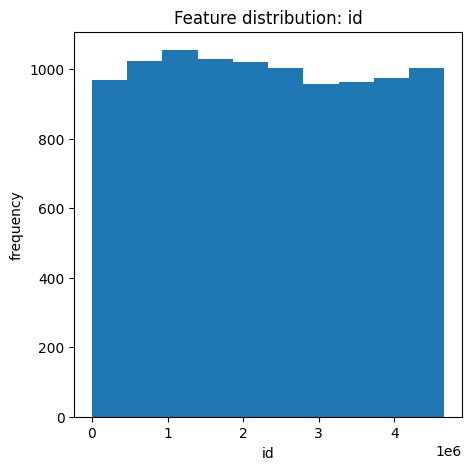

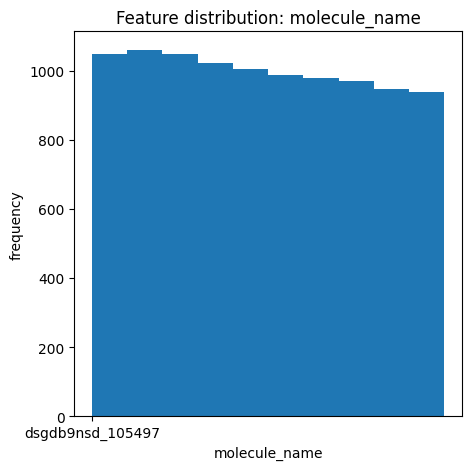

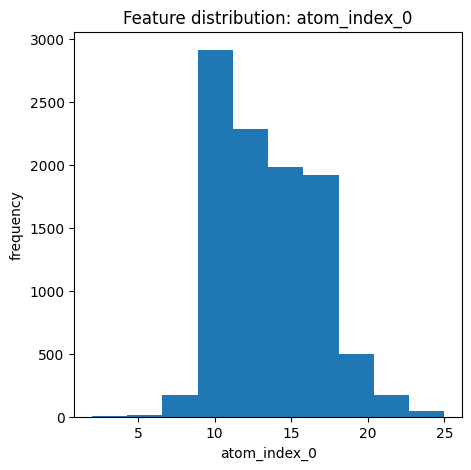

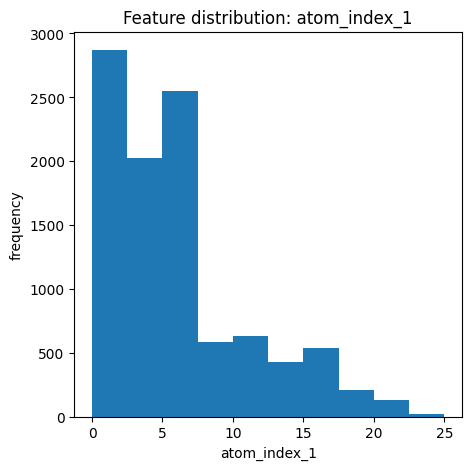

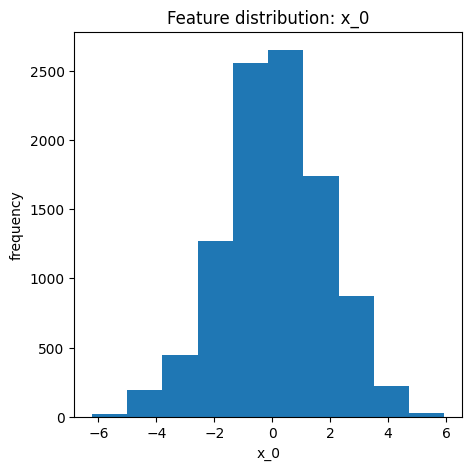

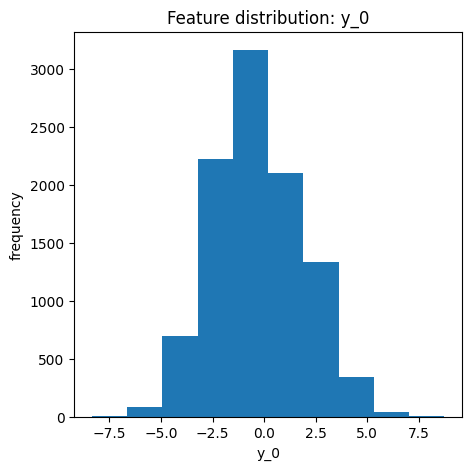

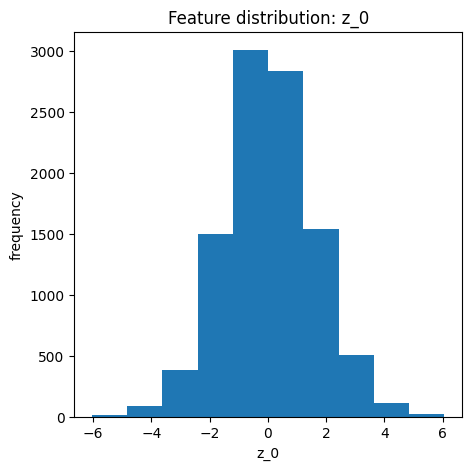

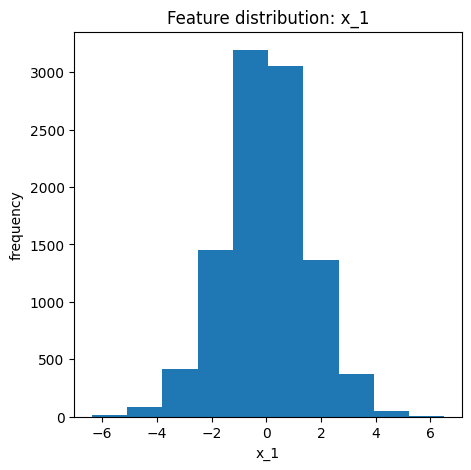

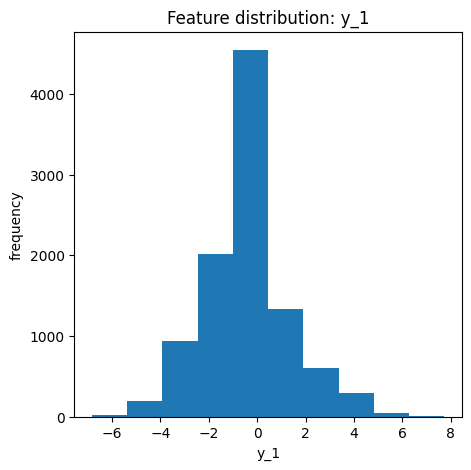

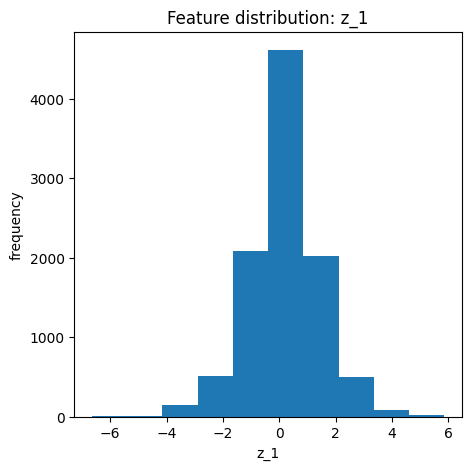

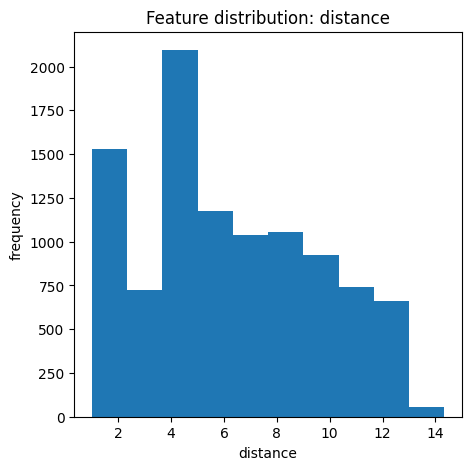

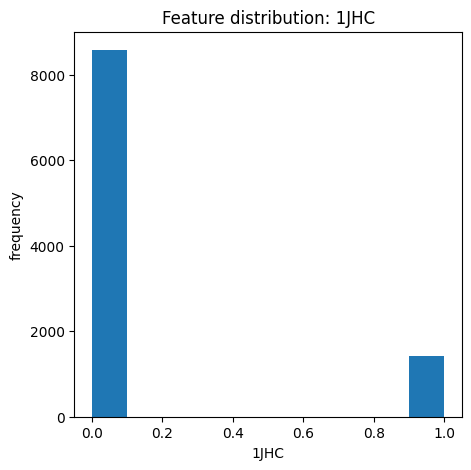

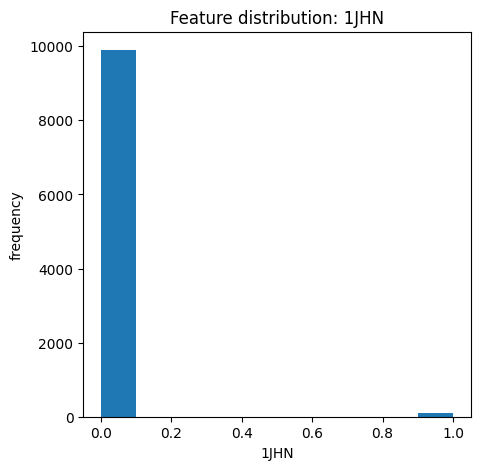

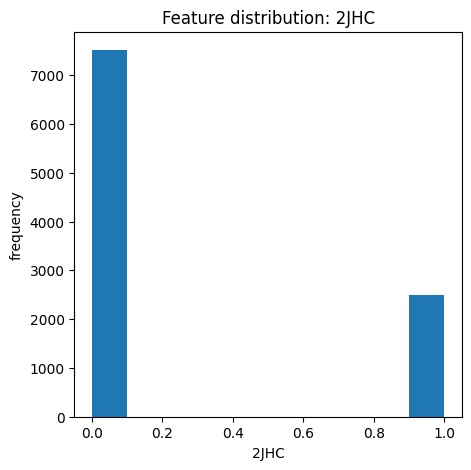

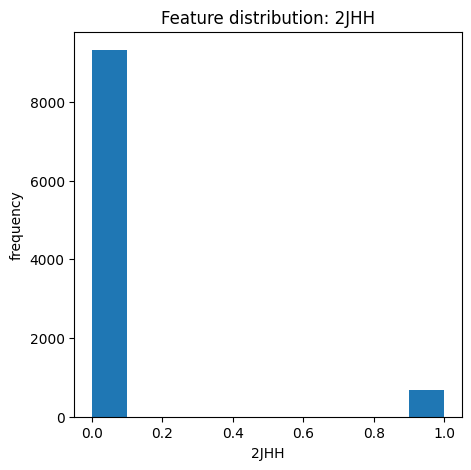

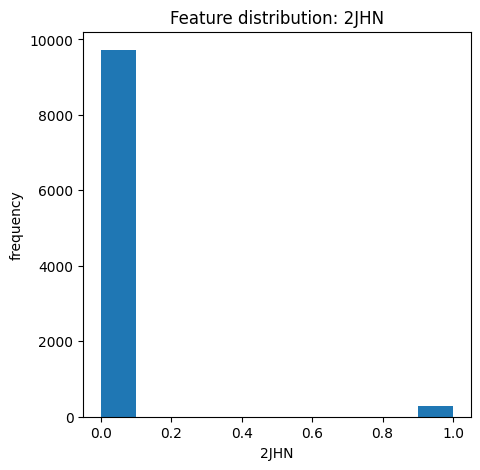

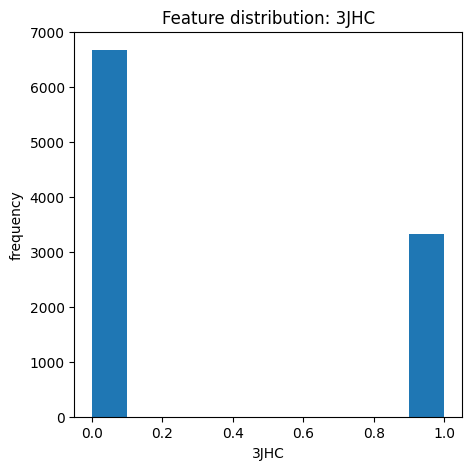

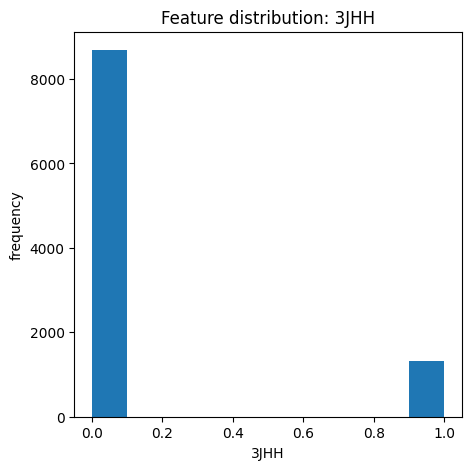

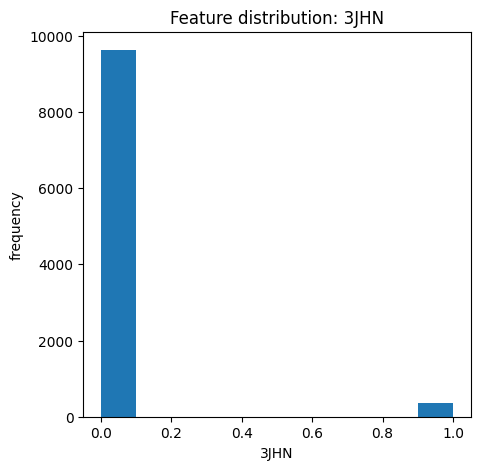

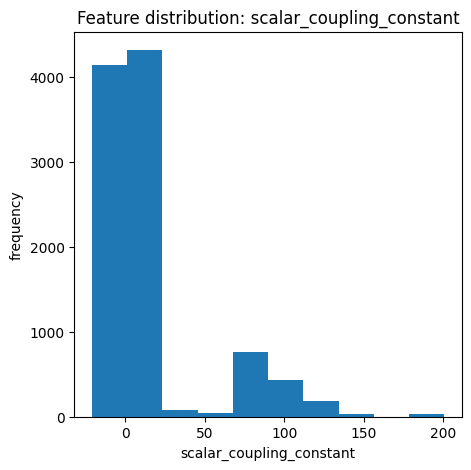

In [ ]:
np.random.seed(3948732)
subset = np.random.randint(0,merged_train.shape[0],10000)

for c in merged_train.columns:
  ax = pl.figure(figsize=(5,5)).add_subplot(111)
  ax.hist(merged_train[c].iloc[subset])
  ax.set_title("Feature distribution: " + c)
  ax.set_xlabel(c)
  ax.set_ylabel("frequency")
  if c=="molecule_name":
    pl.xticks([0])




Non tutti gli istogrammi sono rilevanti, in particolare si possono fare alcune osservazioni:
- Le prime due colonne sono soltanto identificative e ovviamente non portano significato fisico, di conseguenza non ha senso che vengano tenute in considerazione nella definizione del modello.
- Anche l'atom_index è una variabile identificativa e non porta informazioni fisiche riguardo il legame, le diverse distribuzioni dipendono dal modo in cui sono stati eseguiti gli accoppiamenti. Per questo motivo verrà deciso di non inserire nei modelli questa feature. Potrebbe aver senso dal punto di vista statistico mantenerle nel caso ci fosse qualche tipo di bias nel criterio utilizzato per nominare gli atomi, ma ritengo che dal punto di vista fisico sia meno rilevante e quindi sia più generale un modello che non include queste features.
- Le coordinate dei due atomi seguono distribuzioni sufficientemente regolari da non richiedere un'analisi più approfondita
- La coordinata x del primo atomo presenta una distribuzione asimmetrica e molto sbilanciata verso lo 0, è probabile che in base a come sono strutturate le molecole oppure in base al criterio seguto per nominare uno dei due atomi "atomo 0" quest'ultimo sia sistematicamente più vicino a x=0 rispetto al secondo atomo.
- L'istogramma delle distanze è molto spostato verso lo 0, ragionevolmente in quanto il centro delle distribuzioni di ogni coordinata è vicino a 0.
- L'istogramma delle costanti di accoppiamento sembra avere un carattere bimodale, con due picchi distinti, uno intorno allo 0 e uno tra 50 e 100


##Scatter Matrix
Si procede poi con una matrice di scattering per mettere in luce eventuali correlazioni o distribuzioni patologiche.

Vengono ignorate le colonne relative al OHE in quanto non presentano informazioni utili da visualizzare in questo contesto.



Index(['id', 'molecule_name', 'atom_index_0', 'atom_index_1', 'x_0', 'y_0',
       'z_0', 'x_1', 'y_1', 'z_1', 'distance', '1JHC', '1JHN', '2JHC', '2JHH',
       '2JHN', '3JHC', '3JHH', '3JHN', 'scalar_coupling_constant'],
      dtype='object')


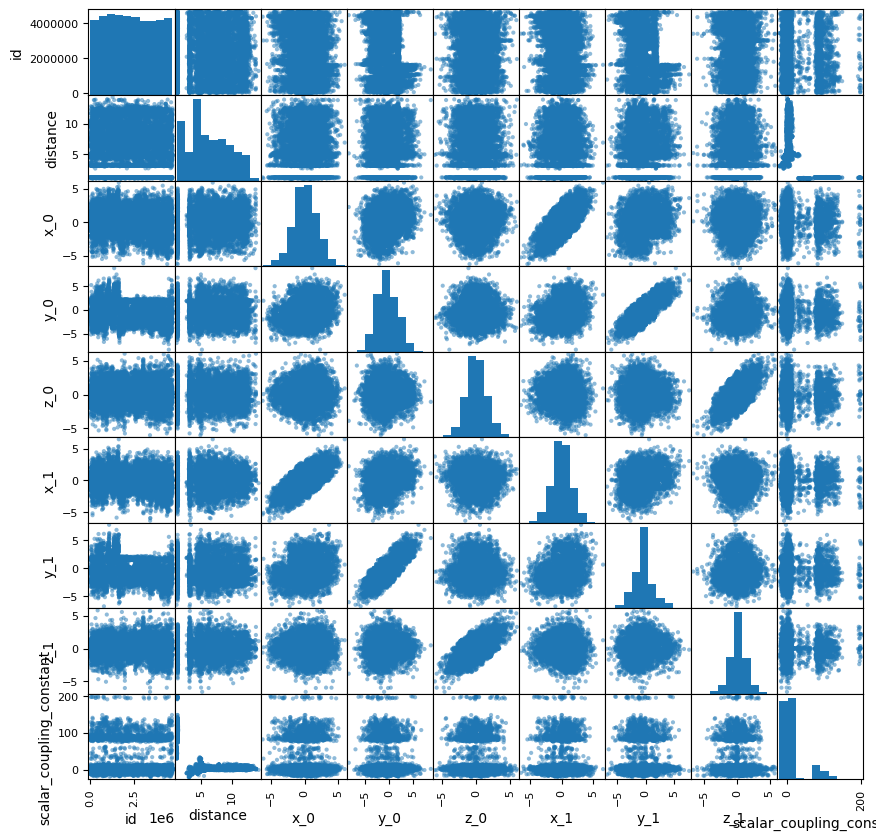

In [ ]:
print(merged_train.columns)
pd.plotting.scatter_matrix(merged_train.iloc[subset][['id', 'molecule_name', 'distance', 'x_0',
       'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'scalar_coupling_constant']], figsize=(10,10) );


Anche in questo caso si possono osservare diversi particolari:
- Si nota una evidente correlazione tra le coordinate lungo lo stesso asse per i due diversi atomi che compongono il legame (x_0 e x_1 ecc.)
- Il carattere bimodale della distribuzione della costante di accoppiamento fa sì che tutti gli scatter nei quali una delle due features è la costante presentino due zone separate con pochi elementi nel mezzo.
- Osservando la correlazioni fra la distanza e la costante di accoppiamento di osserva la formazione di due regioni nettamente separate, sarà oggetto di ulteriore approfondimento


##Distanza e Costante di accoppiamento
Si mostra ora più in dettaglio il legame tra la distanza e la costante di accoppiamento, sottolineando la presenza di tre regioni ben separate:
- due regioni "verticali" che (su questa scala) sembrano presentare poca dipendenza dalla distanza ma grande variabilità nella costante di accoppiamento.
- una regione pressochè "orizzontale" che presenta una grande varaibilità nella distanza e una minore varianza rispetto alla costante di accoppiamento, risulta più estesa e distribuita rispetto alle regioni verticali.


Infine colorando in modo differente i punti sulla base del tipo di legame si nota un forte legame tra quest'ultimo e la posizione all'interno dello spazio distanza - costante di accoppiamento.


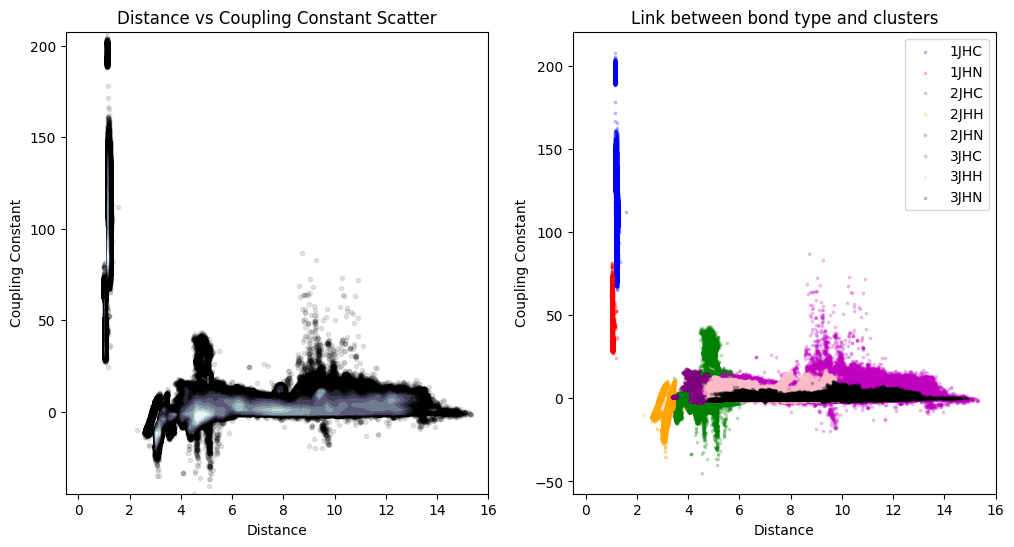

In [ ]:
fig =pl.figure(figsize=(12,6))
ax = fig.add_subplot(121)
plotting.scatter_contour(merged_train["distance"], merged_train["scalar_coupling_constant"],
                         threshold=1000, log_counts=True,
                         histogram2d_args=dict(bins=(100,100)), filled_contour=True,
                         plot_args=dict(marker='.', linestyle='none', color='black', alpha=0.1),
                         contour_args=dict(alpha=1, cmap='bone'))
ax.set_ylabel('Coupling Constant')
ax.set_xlabel('Distance')
ax.set_xlim(-0.5, 16)
ax.set_title("Distance vs Coupling Constant Scatter")


#'1JHC', '1JHN', '2JHC', '2JHH',
 #      '2JHN', '3JHC', '3JHH', '3JHN'
ax2=fig.add_subplot(122)
ax2.scatter(merged_train[merged_train["1JHC"]==1]["distance"], merged_train[merged_train["1JHC"]==1]["scalar_coupling_constant"],
           s=3, alpha=0.2, color = 'b', label = "1JHC")

ax2.scatter(merged_train[merged_train["1JHN"]==1]["distance"], merged_train[merged_train["1JHN"]==1]["scalar_coupling_constant"],
           s=3, alpha=0.2, color = 'r', label = "1JHN")

ax2.scatter(merged_train[merged_train["2JHC"]==1]["distance"], merged_train[merged_train["2JHC"]==1]["scalar_coupling_constant"],
           s=3, alpha=0.2, color = 'g', label = "2JHC")

ax2.scatter(merged_train[merged_train["2JHH"]==1]["distance"], merged_train[merged_train["2JHH"]==1]["scalar_coupling_constant"],
           s=3, alpha=0.2, color = 'orange', label = "2JHH")

ax2.scatter(merged_train[merged_train["2JHN"]==1]["distance"], merged_train[merged_train["2JHN"]==1]["scalar_coupling_constant"],
           s=3, alpha=0.2, color = 'purple', label = "2JHN")

ax2.scatter(merged_train[merged_train["3JHC"]==1]["distance"], merged_train[merged_train["3JHC"]==1]["scalar_coupling_constant"],
           s=3, alpha=0.2, color = 'm', label = "3JHC")

ax2.scatter(merged_train[merged_train["3JHH"]==1]["distance"], merged_train[merged_train["3JHH"]==1]["scalar_coupling_constant"],
           s=3, alpha=0.2, color = 'pink', label = "3JHH")

ax2.scatter(merged_train[merged_train["3JHN"]==1]["distance"], merged_train[merged_train["3JHN"]==1]["scalar_coupling_constant"],
           s=3, alpha=0.2, color = 'k', label = "3JHN")

ax2.set_ylabel('Coupling Constant')
ax2.set_xlabel('Distance')
ax2.set_xlim(-0.5, 16)
ax2.set_title("Link between bond type and clusters")
ax2.legend()

Al netto di queste considerazioni si potrebbe decidere di costruire un modello per ogni costante di accoppiamento, tuttavia la scelta dei modelli ricadrà sugli alberi di regressione, di conseguenza non è necessario apportare ulteriori modifiche: i nodi relativi alla variabile categorica si occuperanno di separare le zone mostrare in figura.

##Matrice di correlazione

Come ultima cosa si mostra la matrice di correlazione fra tutte le features:

<ipython-input-45-e9236034ef87>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(data=merged_train.corr(), annot=True, cmap='RdBu', fmt=".2f", linewidths=0.5, vmin = -1, vmax = 1)


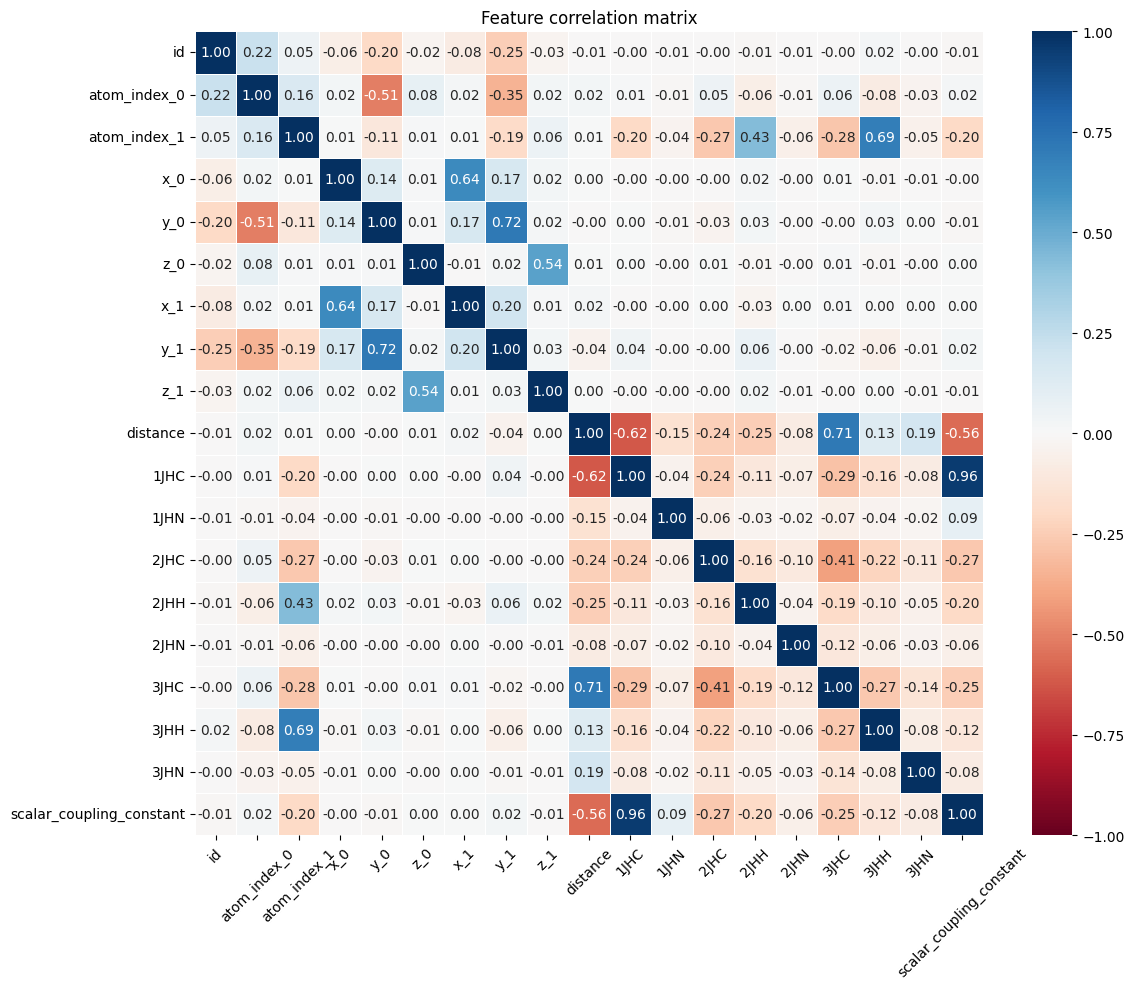

In [ ]:
pl.figure(figsize=(12, 10))
sn.heatmap(data=merged_train.corr(), annot=True, cmap='RdBu', fmt=".2f", linewidths=0.5, vmin = -1, vmax = 1)
pl.title('Feature correlation matrix')
pl.xticks(rotation=45)
pl.tight_layout();
pl.show();

Questa matrice mette in evidenza le stesse osservazioni fatte in precedenza:
- forte correlazione fra coordinate dello stesso asse in atomi differenti
- alcune correlazioni tra il tipo di legame e la distanza
- alcune correlazioni tra il tipo di legame e la costante di accoppiamento
- di conseguenza correlazione tra la distanza e la costante di accoppiamento
- alcune correlazioni tra gli indici e alcune features

# Task IV: model choice and preprocessing
Now its time to choose your model.
- Justify your choice (based on the nature of the data and task to be performed)
- Prepare (scale, whiten) the data accordingly
- Split the data into train/test or train/validation/test
- Create, Run, Tune the model

*(Hint: this is a lot of data! while you are trying out things you probably want to use only a subset of the data, like I suggested above for the visualizations. Before turning in the final version then you can run on the full dataset)*

**Scelta del modello :** Considerando il tipo di variabile da predire, fra i modelli di regressione che si potrebbero utilizzare si osservano:

- Linear Regression
- Neural Networks
- Regression Trees

Approssimare ad una relazione lineare il legame fra le features e la variabile da predire potrebbe essere riduttivo, mentre utilizzando un Neural Network si ha meno controllo sull'importanza ed il ruolo delle features, di conseguenza la scelta del modello cade sugli alberi di regressione, in particolare RandomForest e Gradient Boosting.

Come prima indagine si seleziona un subset piccolo del dataframe, ovvero circa 200000 osservazioni scelte in modo casuale. Su di esso si costruirà un primo modello in modo da poter scegliere un set di iperparametri ottimlai con i quali verrà costruito il modello finale.

Esso sarà "allenato" su un numero maggiore di dati, per massimizzarne l'accuratezza.


## Creazione del subset e dei train e test set

Si chiama inizialmente la funzione `train_test_split` facendo uso dell'opzione `stratify` per ottenere un subset del dataset completo che mantenga le proporzioni per ogni tipo di legame differente, il subset è dato dal training set, il resto viene scartato.

Si chiama la funzione `train_test_split` una seconda volta: questa volta non si scarta il test set ma sarà quello sul quale viene valutato lo score del modello.

In [ ]:
merged_train.columns

Index(['id', 'molecule_name', 'atom_index_0', 'atom_index_1', 'x_0', 'y_0',
       'z_0', 'x_1', 'y_1', 'z_1', 'distance', '1JHC', '1JHN', '2JHC', '2JHH',
       '2JHN', '3JHC', '3JHH', '3JHN', 'scalar_coupling_constant'],
      dtype='object')

In [ ]:
target = merged_train.scalar_coupling_constant
merged_train.drop(columns = ["scalar_coupling_constant", "id", "molecule_name", "atom_index_0", "atom_index_1"], inplace = True);


<ipython-input-47-c50ea657af83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_train.drop(columns = ["scalar_coupling_constant", "id", "molecule_name", "atom_index_0", "atom_index_1"], inplace = True);


In [ ]:
merged_train.columns

Index(['x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'distance', '1JHC', '1JHN',
       '2JHC', '2JHH', '2JHN', '3JHC', '3JHH', '3JHN'],
      dtype='object')

Eseguo uno scaling dei dati per avere le distribuzioni delle feature continue con media 0 e deviazione standard 1.

In [ ]:

preprocessing.scale(merged_train[['x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'distance']], axis = 1, copy = False);

In [ ]:
CART, junk1,target_small,junk2 = train_test_split(merged_train,target,train_size = 0.1, random_state=123, stratify=merged_train[['1JHC', '1JHN',
       '2JHC', '2JHH', '2JHN', '3JHC', '3JHH', '3JHN']])

Il risultato di `train_test_split` è un array, sul quale non posso applicare nuovamente la stessa funzione, lo rendo nuovamente un dataframe

In [ ]:
del junk1
del junk2
CART = pd.DataFrame(CART, columns = [ 'x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'distance',
       '1JHC', '1JHN', '2JHC', '2JHH', '2JHN', '3JHC', '3JHH', '3JHN'])


In [ ]:
CART.columns

Index(['x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'distance', '1JHC', '1JHN',
       '2JHC', '2JHH', '2JHN', '3JHC', '3JHH', '3JHN'],
      dtype='object')

In [ ]:
target_small.shape

(450314,)

Col secondo `train_test_split` ottengo lo split che utilizzerò nei modelli seguenti

In [ ]:
X_train_cart, X_test_cart, y_train_cart, y_test_cart = train_test_split(CART,target_small,train_size = 0.8, random_state=0, stratify=CART[['1JHC', '1JHN','2JHC', '2JHH', '2JHN', '3JHC', '3JHH', '3JHN']])

##Analisi preliminare sui due tipi di ensemble di alberi
Inizio costruendo un RandomForest e un GradientBoosting con i parametri default e ne osservo le performance

In [ ]:
RF = RandomForestRegressor(random_state = 12)

RF.fit(X_train_cart, y_train_cart)
print(RF.score(X_train_cart,y_train_cart),RF.score(X_test_cart,y_test_cart))
RF.get_params()

0.9985425854393272 0.9893566379950081


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 12,
 'verbose': 0,
 'warm_start': False}

Questo primo RandomForest ha performance molto buone per quanto riguarda il training set ma presenta un leggero overfitting: lo "score" (ovvero l'$R^2$) è leggermente peggiore nel test set, sintomo di overfitting.




Procedo in modo analogo con un GradientBoostingRegressor

In [ ]:
GBT = GradientBoostingRegressor(random_state=420, n_iter_no_change = 10 )
GBT.fit(X_test_cart, y_test_cart)
print(GBT.score(X_train_cart,y_train_cart),GBT.score(X_test_cart,y_test_cart))
GBT.get_params()

0.9857710001688659 0.9856638743185986


{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': 10,
 'random_state': 420,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In questo caso l'accuratezza su entrambi i set è minore ma molto simile: non è evidente quindi un overfitting

In entrambi i casi utilizzo il metodo `get_params()` per osservare i parametri di default utilizzati

Metto infine a confronto la metrica L2 per entrambi i parametri, ovvero la somma dei quadrati delle distanze tra la predizione ed il valore target:


In [ ]:
RFprediction_test = RF.predict(X_test_cart)
GBTprediction_test = GBT.predict(X_test_cart)

RF_L2_test = pow(RFprediction_test-y_test_cart,2).sum()
GBT_L2_test = pow(GBTprediction_test-y_test_cart,2).sum()

print("Distanza L2 per il Random Forest: {:.4} Distanza L2 per il Gradient Boosting: {:.4}\n".\
      format(RF_L2_test, GBT_L2_test))

Distanza L2 per il Random Forest: 1.143e+06 Distanza L2 per il Gradient Boosting: 1.539e+06



##Scelta del modello:
Per proseguire sceglierò di utilizzare un modello di Random Forest.

Dai risultati viene mostrato che lo score, così come la metrica L2 siano migliori per questo modello. Tuttavia è un modello che presenta spesso overfitting, l'obiettivo dell'ottimizzazione dei parametri sarà quello di minimizzare quest'ultimo mantenendo una buona accuratezza.

##Random Forest, tuning dei parametri

Seleziono un set di valori per gli iperparametri che voglio ottimizzare, in questo caso sono:
- Profondità massima: una profondità massima infinita è molto pericolosa per quanto riguarda l'overfitting, quindi scelgo di provare tre valori finiti;
- max_feature: scelgo il massimo delle features che vengono controllate per ogni nodo, in particolare se agire su una feature per volta o su un sottoset delle features totali
- n_estimators: il numero di alberi all'interno dell'ensemble

In [ ]:

random_grid = {'max_depth': [10, 20, 30],
 'max_features': ['sqrt',1],
 'n_estimators': [10, 100, 200]}


Costruisco un nuovo modello specificando un parametro che voglio mantenere costante: `min_samples_leaf` impone che una volta costruito ogni albero ci siano almeno 10 elementi per ogni foglia, l'obiettivo di questo passaggio è di limitare l'overfitting.
Anche questo potrebbe essere un parametro da inserire nel tuning, lo evito per ridurre tempo di esecuzione e memoria occupata.

In [ ]:
RF = RandomForestRegressor(min_samples_leaf = 10, random_state = 12)

In [ ]:
random_search = RandomizedSearchCV(estimator = RF, param_distributions=random_grid,
                                   n_iter=15, cv=3)

Lascio questo passaggio commentato: non sono riuscito a fare in modo che, compatibilmente con il resto del notebook, questo passaggio non fosse la causa di un overflow di memoria, il risultato di questa ricerca, che durava circa un ora e mezza, è dato dai parametri utilizzati subito dopo per costruire il modello.

In [ ]:
#random_search.fit(X_train_cart,y_train_cart)
#circa un ora

In [ ]:
#print("Tuned RF  Parameters: {}".format(random_search.best_params_))
#print("Best score is {}".format(random_search.best_score_))

In [ ]:
RF = RandomForestRegressor(random_state=420 , n_estimators = 200, max_features="sqrt", max_depth = 30)
RF.fit(X_train_cart,y_train_cart)

RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=200,
                      random_state=420)

In [ ]:
print("Score calcolato sul training set: {:.4}, score calcolato sul test set: {:.4}, ".
      format(RF.score(X_train_cart,y_train_cart), RF.score(X_test_cart,y_test_cart)))

Score calcolato sul training set: 0.9981, score calcolato sul test set: 0.9894, 


In [ ]:
del CART
del X_test_cart
del X_train_cart

# Task V: model evaluation


Report on the model result

Visualize the prediction against the true values of the target variable

Utilizzando i parametri ottimali ottenuti tramite random search costrusico un modello partendo da un training set molto più grande, sarà dispendioso in termini di tempo ma fornirà una predizione migliore.

In [ ]:
merged_train.columns

Index(['x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'distance', '1JHC', '1JHN',
       '2JHC', '2JHH', '2JHN', '3JHC', '3JHH', '3JHN'],
      dtype='object')

In [ ]:
X_train_final, X_test_final, y_train_final,y_test_final = train_test_split(merged_train.values,target,train_size = 0.1, random_state=33424, stratify=merged_train[['1JHC', '1JHN',
       '2JHC', '2JHH', '2JHN', '3JHC', '3JHH', '3JHN']])

In [ ]:
final_score_train, final_score_test = RF.score(X_train_final,y_train_final), RF.score(X_test_final,y_test_final)


print("Score calcolato sul training set: {:.4}, score calcolato sul test set: {:.4}, ".
      format(final_score_train, final_score_test))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Score calcolato sul training set: 0.9902, score calcolato sul test set: 0.9901, 


In [ ]:
prediction_final = RF.predict( X_test_final)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Come prima cosa visualizzo un confronto tra la distribuzione target e quella predetta, attraverso un istogramma:

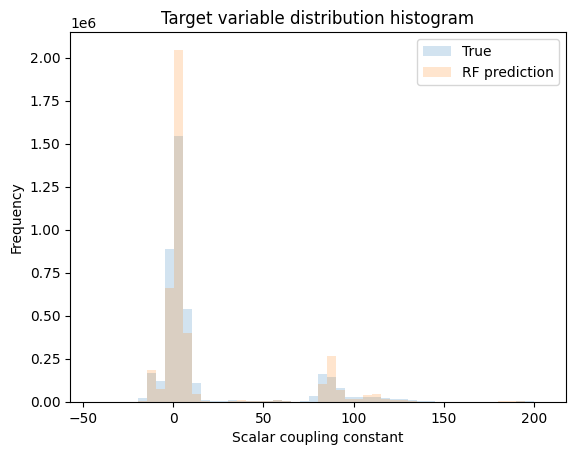

In [ ]:
steps = np.arange(min(target), max(target),5)
pl.hist(y_test_final,label="True", alpha = 0.2,bins = steps)
pl.hist(prediction_final,label="RF prediction", alpha = 0.2,bins = steps)
pl.title("Target variable distribution histogram")
pl.ylabel("Frequency")
pl.xlabel("Scalar coupling constant")
pl.legend()

Per avere un idea migliore decido di fare uno scatter plot fra il valore predetto e quello target(non plotto tutti i dati ma soltanto il primo milione, per fare un plot più significativo si potrebbe plottare un milione di punti presi in modo casuale):

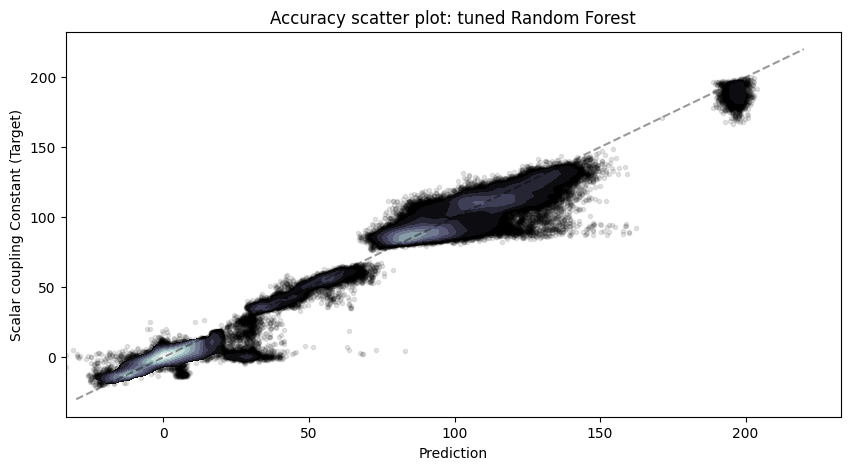

In [ ]:
fig =pl.figure(figsize=(10,5))
plotting.scatter_contour(y_test_final[0:1000000],prediction_final[0:1000000],
                         threshold=50, log_counts=True,
                         histogram2d_args=dict(bins=(100,100)), filled_contour=True,
                         plot_args=dict(marker='.', linestyle='none', color='black', alpha=0.1),
                         contour_args=dict(alpha=1, cmap='bone'))
pl.ylabel('Scalar coupling Constant (Target)')
pl.xlabel('Prediction')
pl.title("Accuracy scatter plot: tuned Random Forest")
pl.plot([-30,220],[-30,220],'k',linestyle='dashed', alpha = 0.4)

Il risultato, esteticamente, sembra buono, osservo che i punti si addensano attorno alla bisettrice del primo quadrante, che rappresenta la soluzione ottimale. Sono presenti tuttavia outliers.

# Task VI: Perform (at least) one additional task


- **If you used a linear regression model**
Try at least one CART model

- **If you used a CART model**
Make a plot of the feature importance, identify if there is a dominant feature, if so remove it (or remove the feature family altogether) and redo the fit. Can you still predict values effectively?

- **If you used a neural network**
Try change the architecture e.g. modify the number of layers, adding dropout layers to address overfitting, changing optimizer/loss/activation functions (but justify the choices on the basis of data and task)

- **If you used yet another model**
Try at least one CART model

- Alternatively, for whichever model you used
You can **use additional variables or create additional features** by manipulating and combining variables (e.g. the xyz values can be turned into distances like was done for example here https://www.kaggle.com/code/artgor/molecular-properties-eda-and-models/notebook)

Come ultima analisi si visualizza l'importanza di ogni feature

In [ ]:
feature_importances = RF.feature_importances_
feature_importances
std = np.std([onetree.feature_importances_ for onetree in RF.estimators_],
             axis=0)
indicesrf = np.argsort(feature_importances)[::-1]





print("Feature ranking:")

for f in range(merged_train.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indicesrf[f],
                                   merged_train.columns[
                indicesrf[f]],
                                   feature_importances[indicesrf[f]]))

Feature ranking:
1. feature 7 1JHC (0.455212)
2. feature 6 distance (0.424732)
3. feature 12 3JHC (0.029188)
4. feature 9 2JHC (0.025471)
5. feature 10 2JHH (0.016282)
6. feature 13 3JHH (0.010596)
7. feature 8 1JHN (0.008284)
8. feature 4 y_1 (0.005825)
9. feature 1 y_0 (0.004691)
10. feature 0 x_0 (0.003819)
11. feature 2 z_0 (0.003794)
12. feature 5 z_1 (0.003748)
13. feature 14 3JHN (0.003533)
14. feature 3 x_1 (0.003314)
15. feature 11 2JHN (0.001511)


Si possono osservare alcuni particolari:
- La distanza tra i due atomi gioca un ruolo decisivo, ma di poco non risulta la feature più importante. Il motivo è che il tipo di legame 1JHC caratterizza il cluster verticale molto evidente nello scatter plot mostrato durante l'esplorazione dei dati: si tratta di un cluster poco numeroso rispetto al resto del dataframe ma molto localizzato, è ragionevole che l'importanze di questa feature sia molto elevata. In aggiunta questo tipo di legame era quello che, dalla matrice delle correlazioni, risultava maggiormente correlato con la distanza.
- Il tipo di legame 2JHN risulta la feature meno importante: facendo riferimento allo scatter plot che lega i colori al tipo di legame si vede come questo tipo, corrispondente al colore viola occupi una zona molto estesa che presenta anche punti relativamente isolati.
- Le coordinate dei singoli atomi hanno una importanza bassa, giustificata probabilmente dalla fisica dell'interazione in questione: è ragionevole pensare che la costante di accoppiamento abbia una dipendenza dalla posizione relativa dei due atomi dalla posizione assoluta nello spazio.

##Rimozione del tipo di legame

Si costruisce un secondo modello rimuovendo la famiglia di feature alla quale apparteneva la feature con l'importanza maggiore, ovvero il tipo di interazione

In [ ]:
no_bond_type = merged_train.drop(columns = ['1JHC', '1JHN',
       '2JHC', '2JHH', '2JHN', '3JHC', '3JHH', '3JHN'])



X_train_notype, X_test_notype, y_train_notype,y_test_notype = train_test_split(no_bond_type.values,target,train_size = 0.1, random_state=3464325)

In [ ]:
RF_notype = RandomForestRegressor(random_state=254 , n_estimators = 200, max_features="sqrt", max_depth = 20)
RF_notype.fit(X_train_notype,y_train_notype)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200,
                      random_state=254)

In [ ]:
notype_score_train, notype_score_test = RF_notype.score(X_train_notype,y_train_notype),RF_notype.score(X_test_notype,y_test_notype)

print("Score calcolato sul training set: {:.4}, score calcolato sul test set: {:.4}, ".format(notype_score_train, notype_score_test))

Score calcolato sul training set: 0.9936, score calcolato sul test set: 0.9876, 


In [ ]:
prediction_notype = RF_notype.predict(X_test_notype)

Come nel caso precedente si fa uno scatter per visualizzare i risultati

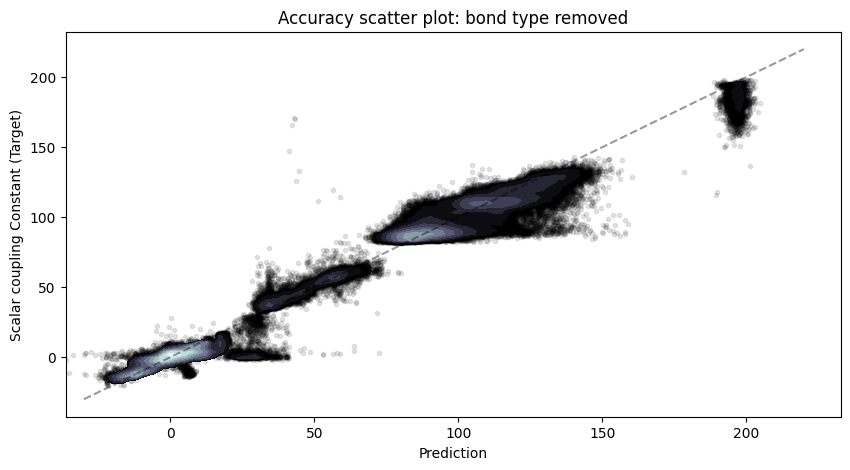

In [ ]:

fig =pl.figure(figsize=(10,5))
plotting.scatter_contour(y_test_notype[1:1000000],prediction_notype[1:1000000],
                         threshold=50, log_counts=True,
                         histogram2d_args=dict(bins=(100,100)), filled_contour=True,
                         plot_args=dict(marker='.', linestyle='none', color='black', alpha=0.1),
                         contour_args=dict(alpha=1, cmap='bone'))
pl.ylabel('Scalar coupling Constant (Target)')
pl.xlabel('Prediction')
pl.title("Accuracy scatter plot: bond type removed")
pl.plot([-30,220],[-30,220],'k',linestyle='dashed', alpha = 0.4)

In [ ]:
notype_feature_importances = RF_notype.feature_importances_
notype_feature_importances
std = np.std([onetree.feature_importances_ for onetree in RF.estimators_],
             axis=0)
notype_indicesrf = np.argsort(notype_feature_importances)[::-1]




print("Feature ranking:")

for f in range(7):
    print("%d. feature %d %s (%f)" % (f + 1, notype_indicesrf[f],
                                   merged_train.columns[notype_indicesrf[f]],
                                   notype_feature_importances[notype_indicesrf[f]]))

Feature ranking:
1. feature 6 distance (0.932340)
2. feature 1 y_0 (0.016943)
3. feature 4 y_1 (0.015884)
4. feature 2 z_0 (0.011631)
5. feature 0 x_0 (0.009039)
6. feature 3 x_1 (0.007521)
7. feature 5 z_1 (0.006642)


Ragionevolmente in questo caso la distanza risulta la feature più importante, mentre l'importanza delle coordinate singole è molto ridotta.

In [ ]:
del X_train_final
del X_train_notype
del X_test_final
del X_test_notype


##Rimozione della distanza

Infine si costruisce un ultimo modello rimuovendo in questo caso la distanza:


In [ ]:
no_distance = merged_train.drop(columns = ['distance'])

X_train_nodist, X_test_nodist, y_train_nodist,y_test_nodist = train_test_split(no_distance.values,target,train_size = 0.1, random_state=33924, stratify=no_distance[['1JHC', '1JHN',
       '2JHC', '2JHH', '2JHN', '3JHC', '3JHH', '3JHN']])

In [ ]:
RF_nodist = RandomForestRegressor(random_state=2323 , n_estimators = 200, max_features="sqrt", max_depth = 20)
RF_nodist.fit(X_train_nodist,y_train_nodist)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200,
                      random_state=2323)

In [ ]:
nodist_score_train, nodist_score_test = RF_nodist.score(X_train_nodist,y_train_nodist),RF_nodist.score(X_test_nodist,y_test_nodist)

print("Score calcolato sul training set: {:.4}, score calcolato sul test set: {:.4}, ".format(nodist_score_train, nodist_score_test))

Score calcolato sul training set: 0.9819, score calcolato sul test set: 0.9666, 


In [ ]:
prediction_nodist = RF_nodist.predict(X_test_nodist)

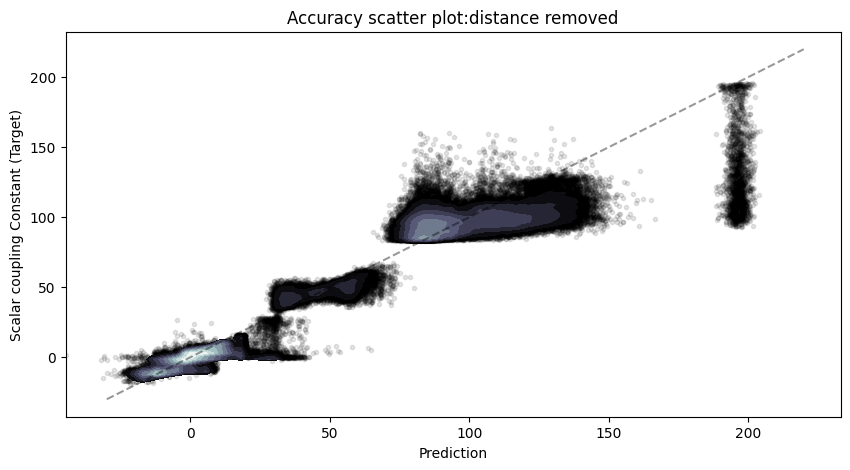

In [ ]:

fig =pl.figure(figsize=(10,5))
plotting.scatter_contour(y_test_nodist[1:1000000],prediction_nodist[1:1000000],
                         threshold=50, log_counts=True,
                         histogram2d_args=dict(bins=(100,100)), filled_contour=True,
                         plot_args=dict(marker='.', linestyle='none', color='black', alpha=0.1),
                         contour_args=dict(alpha=1, cmap='bone'))
pl.ylabel('Scalar coupling Constant (Target)')
pl.xlabel('Prediction')
pl.title("Accuracy scatter plot:distance removed")
pl.plot([-30,220],[-30,220],'k',linestyle='dashed', alpha = 0.4)

In [ ]:
nodist_feature_importances = RF_nodist.feature_importances_
nodist_feature_importances
std = np.std([onetree.feature_importances_ for onetree in RF.estimators_],
             axis=0)
nodist_indicesrf = np.argsort(nodist_feature_importances)[::-1]




print("Feature ranking:")

for f in range(no_distance.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, nodist_indicesrf[f],
                                   no_distance.columns[nodist_indicesrf[f]],
                                   nodist_feature_importances[nodist_indicesrf[f]]))

Feature ranking:
1. feature 6 1JHC (0.691986)
2. feature 8 2JHC (0.076377)
3. feature 11 3JHC (0.063724)
4. feature 9 2JHH (0.039672)
5. feature 12 3JHH (0.034835)
6. feature 13 3JHN (0.015708)
7. feature 4 y_1 (0.012856)
8. feature 7 1JHN (0.012016)
9. feature 1 y_0 (0.011801)
10. feature 2 z_0 (0.009671)
11. feature 10 2JHN (0.008811)
12. feature 5 z_1 (0.007788)
13. feature 0 x_0 (0.007533)
14. feature 3 x_1 (0.007222)


##Confronto
Per concludere si fa un confronto dei modelli implementati: dal punto di vista dell'importanza delle features e dal punto di vista dell'accuratezza:

Text(0.5, 0, 'Feature Name')

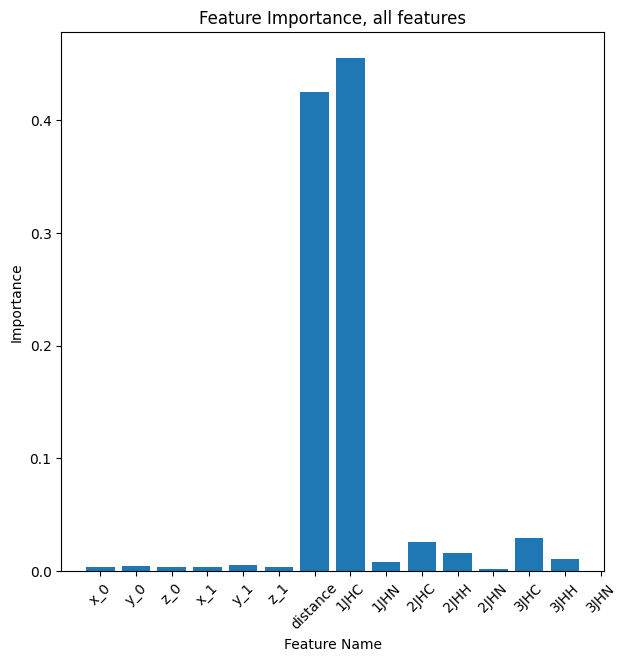

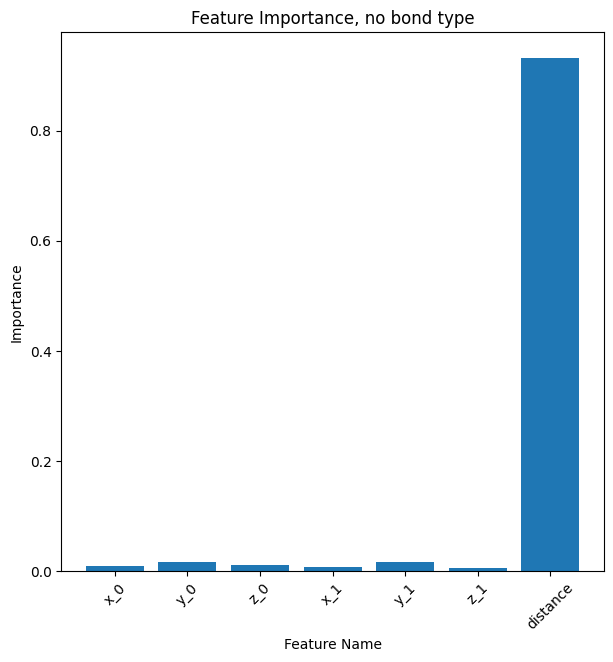

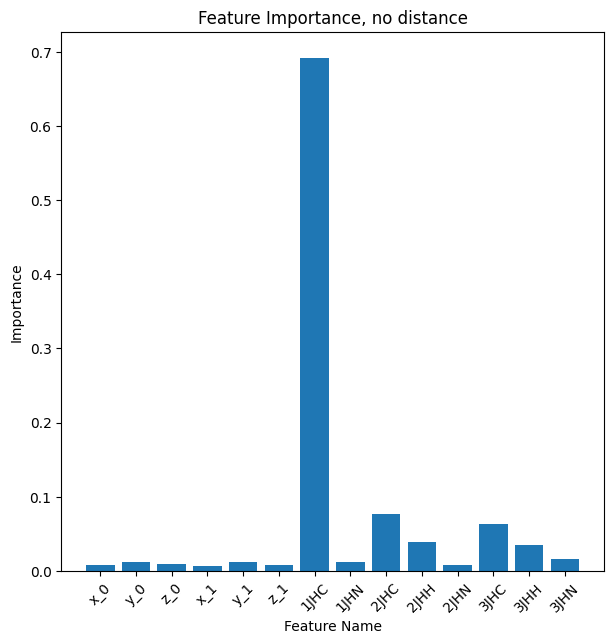

In [ ]:

pl.figure(figsize=(7,7)).add_subplot(111)

pl.title("Feature Importance, all features");
pl.bar(range(max(indicesrf)), feature_importances[range(max(indicesrf))] );
pl.xticks(indicesrf, merged_train.columns[indicesrf], rotation = 45);
pl.ylabel("Importance")
pl.xlabel("Feature Name")


pl.figure(figsize=(7,7)).add_subplot(111)
fig.add_subplot(121)
pl.title("Feature Importance, no bond type");
pl.bar(range(7), notype_feature_importances[0:7] );
pl.xticks(notype_indicesrf, merged_train.columns[notype_indicesrf], rotation=45);
pl.ylabel("Importance")
pl.xlabel("Feature Name")



pl.figure(figsize=(7,7)).add_subplot(111)
fig.add_subplot(121)
pl.title("Feature Importance, no distance");
pl.bar(range(no_distance.shape[1]), nodist_feature_importances[0:no_distance.shape[1]] );
pl.xticks(nodist_indicesrf, no_distance.columns[nodist_indicesrf], rotation=45);
pl.ylabel("Importance")
pl.xlabel("Feature Name")

Gli istogrammi ovviamente riflettono quanto visto in precedenza sull'importanza delle features, è importante sottolineare che il One Hot Encoding eseguito durante la pulizia dei dati gioca un ruolo antagonista all'importanza delle features in quanto a partire da una sola variabile categorica se ne generano 8 binarie.

è ragionevole pensare che, lasciando il tipo di legame come variabile categorica la sua importanza sarebbe stata molto maggiore.

In [ ]:
print("Il modello completo presenta uno score pari a {:.4} per il training set e {:.4} per il test set"\
      .format(final_score_test, final_score_train))
print("Il modello senza tipo di interazione presenta uno score pari a {:.4} per il training set e {:.4} per il test set".\
      format(notype_score_test, notype_score_train))
print("Il modello senza distanza presenta uno score pari a {:.4} per il training set e {:.4} per il test set".\
      format(nodist_score_test, nodist_score_train))

Il modello completo presenta uno score pari a 0.9901 per il training set e 0.9902 per il test set
Il modello senza tipo di interazione presenta uno score pari a 0.9876 per il training set e 0.9936 per il test set
Il modello senza distanza presenta uno score pari a 0.9666 per il training set e 0.9819 per il test set


In [ ]:
L2_completo = pow(prediction_final-y_test_final,2).sum()
L2_notype = pow(prediction_notype-y_test_final,2).sum()
L2_nodist = pow(prediction_nodist-y_test_final,2).sum()

L1_completo = abs(prediction_final-y_test_final).sum()
L1_notype = abs(prediction_notype-y_test_final).sum()
L1_nodist = abs(prediction_nodist-y_test_final).sum()

Linf_completo = max(abs(prediction_final-y_test_final))
Linf_notype = max(abs(prediction_notype-y_test_final))
Linf_nodist = max(abs(prediction_nodist-y_test_final))

media_completo = np.mean(abs(prediction_final-y_test_final))
media_notype = np.mean(abs(prediction_notype-y_test_final))
media_nodist = np.mean(abs(prediction_nodist-y_test_final))

std_completo = np.std(abs(prediction_final-y_test_final))
std_notype = np.std(abs(prediction_notype-y_test_final))
std_nodist = np.std(abs(prediction_nodist-y_test_final))


print("Modello completo, L2= {:.3}".format(L2_completo))
print("Modello senza tipo di interazione, L2= {:.3}".format(L2_notype))
print("Modello senza distanza, L2= {:.3}".format(L2_nodist))

print("\n\nModello completo, L1= {:.3}".format(L1_completo))
print("Modello senza tipo di interazione, L1= {:.3}".format(L1_notype))
print("Modello senza distanza, L1= {:.3}".format(L1_nodist))

print("\n\nModello completo, L_infinito= {:.3}".format(Linf_completo))
print("Modello senza tipo di interazione, L_infinito= {:.3}".format(Linf_notype))
print("Modello senza distanza, L_infinito= {:.3}".format(Linf_nodist))

print("\n\nModello completo,errore medio= {:.3}".format(media_completo))
print("Modello senza tipo di interazione, errore medio= {:.3}".format(media_notype))
print("Modello senza distanza, errore medio= {:.3}".format(media_nodist))

print("\n\nModello completo,deviazione standard errore= {:.2}".format(std_completo))
print("Modello senza tipo di interazione, deviazione standard errore= {:.2}".format(std_notype))
print("Modello senza distanza, deviazione standard errore= {:.2}".format(std_nodist))

Modello completo, L2= 4.76e+07
Modello senza tipo di interazione, L2= 9.54e+09
Modello senza distanza, L2= 9.46e+09


Modello completo, L1= 8.27e+06
Modello senza tipo di interazione, L1= 1.14e+08
Modello senza distanza, L1= 1.14e+08


Modello completo, L_infinito= 78.3
Modello senza tipo di interazione, L_infinito= 2.16e+02
Modello senza distanza, L_infinito= 2.15e+02


Modello completo,errore medio= 2.04
Modello senza tipo di interazione, errore medio= 28.1
Modello senza distanza, errore medio= 28.1


Modello completo,deviazione standard errore= 2.8
Modello senza tipo di interazione, deviazione standard errore= 4e+01
Modello senza distanza, deviazione standard errore= 3.9e+01


Infine si mostrano diverse metriche per i tre modelli finali:
- L2: Il modello completo mostra un L2 molto minore (un ordine di grandezza) rispetto agli altri due, indicazione evidente che sia il modello più preciso fra i 3;
- Anche dal punto di vista della metrica L1 il modello completo risulta molto migliore
- Questa differenza di un ordine di grandezza si ripresenta anche a livello della metrica Linfinito, ovvero dell'errore massimo commesso, nell'errore medio e nella deviazione standard dell'errore.
